In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from tensorflow.keras.optimizers import Adam

In [3]:
df = pd.read_csv('BTC-2021min.csv')

In [4]:
features = ['open', 'high', 'low', 'close','Volume BTC','Volume USD']

In [5]:
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])

In [6]:
# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

In [7]:
# Define the input and output data
X_train = train_df[features].values
X_test = test_df[features].values
y_train = train_df['close'].values
y_test = test_df['close'].values

In [8]:
# Define the model architecture
model = Sequential()
model.add(GRU(units=64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))

In [9]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [11]:
# Train the model
history = model.fit(X_train.reshape(-1, X_train.shape[1], 1), y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
12216/12216 [==============================] - 103s 8ms/step - loss: 2.0080e-06 - val_loss: 3.5390e-06
Epoch 2/5
12216/12216 [==============================] - 104s 8ms/step - loss: 1.3637e-06 - val_loss: 1.2129e-06
Epoch 3/5
12216/12216 [==============================] - 102s 8ms/step - loss: 1.3083e-06 - val_loss: 6.0569e-07
Epoch 4/5
12216/12216 [==============================] - 100s 8ms/step - loss: 1.0035e-06 - val_loss: 5.0680e-07
Epoch 5/5
12216/12216 [==============================] - 102s 8ms/step - loss: 8.6573e-07 - val_loss: 1.8861e-06


In [12]:
# Evaluate the model
test_loss = model.evaluate(X_test.reshape(-1, X_test.shape[1], 1), y_test)

3818/3818 [==============================] - 19s 5ms/step - loss: 1.3250e-06


In [13]:
# Make predictions on new data
y_pred = model.predict(X_test.reshape(-1, X_test.shape[1], 1))

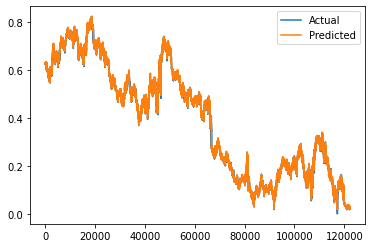

In [14]:
# Plot the results
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [15]:
test_loss

1.3250418078314397e-06

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(y_test,y_pred)

ValueError: continuous is not supported